In [2]:
# general imports
import json
import time
import sys
import random

# drawing imports
%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
import numpy as np

In [3]:
# path variables
# set paths here and you're good to go...

# directory containing coco-a annotations
COCOA_DIR = 'data/COCO-A'
# coco-a json file
COCOA_ANN = 'cocoa_beta2015.json'
# directory containing VisualVerbnet
VVN_DIR = 'data/COCO-A'
# vvn json file
VVN_ANN = 'visual_verbnet_beta2015.json'
# directory containing the MS COCO images
COCO_IMG_DIR = '/media/alex/Woodo/PhD/COCO/images'
# directory containing the MS COCO Python API
COCO_API_DIR = '/home/alex/v-coco/coco/PythonAPI'
# directory containing the MS COCO annotations
COCO_ANN_DIR = '/media/alex/Woodo/PhD/COCO/annotations'


In [4]:
# load cocoa annotations

print("Loading COCO-a annotations...")
tic = time.time()

with open("{0}/{1}".format(COCOA_DIR,COCOA_ANN)) as f:
    cocoa = json.load(f)

# annotations with agreement of at least 1 mturk annotator
cocoa_1 = cocoa['annotations']['1']
# annotations with agreement of at least 2 mturk annotator
cocoa_2 = cocoa['annotations']['2']
# annotations with agreement of at least 3 mturk annotator
cocoa_3 = cocoa['annotations']['3']

print("Done (t={0:.2f}s).".format(time.time() - tic))

Loading COCO-a annotations...
Done (t=0.23s).


In [5]:
# load visual verbnet

print("Loading VisualVerbNet...")
tic = time.time()

with open("{0}/{1}".format(VVN_DIR,VVN_ANN)) as f:
    vvn = json.load(f)

# list of 145 visual actions contained in VVN
visual_actions = vvn['visual_actions']
# list of 17 visual adverbs contained in VVN
visual_adverbs = vvn['visual_adverbs']
    
print("Done, (t={0:.2f}s).".format(time.time() - tic))

Loading VisualVerbNet...
Done, (t=0.00s).


In [6]:
# visual actions in VVN by category

# each visual action is a dictionary with the following properties:
#  - id:            unique id within VVN
#  - name:          name of the visual action
#  - category:      visual category as defined in the paper
#  - definition:    [empty]
#                   an english language description of the visual action
#  - verbnet_class: [empty]
#                   corresponding verbnet (http://verbs.colorado.edu/verb-index/index.php) entry id for each visual action

for cat in set([x['category'] for x in visual_actions]):
    print("Visual Category: [{0}]".format(cat))
    for va in [x for x in visual_actions if x['category']==cat]:
        print("\t - id:[{0}], visual_action:[{1}]".format(va['id'],va['name']))

Visual Category: [nutrition]
	 - id:[46], visual_action:[chew]
	 - id:[47], visual_action:[cook]
	 - id:[48], visual_action:[devour]
	 - id:[49], visual_action:[drink]
	 - id:[50], visual_action:[eat]
	 - id:[51], visual_action:[prepare]
	 - id:[52], visual_action:[spread]
Visual Category: [communication]
	 - id:[18], visual_action:[call]
	 - id:[19], visual_action:[shout]
	 - id:[20], visual_action:[signal]
	 - id:[21], visual_action:[talk]
	 - id:[22], visual_action:[whistle]
	 - id:[23], visual_action:[wink]
Visual Category: [social]
	 - id:[115], visual_action:[accompany]
	 - id:[116], visual_action:[be_with]
	 - id:[117], visual_action:[chase]
	 - id:[118], visual_action:[dance]
	 - id:[119], visual_action:[dine]
	 - id:[120], visual_action:[dress]
	 - id:[121], visual_action:[feed]
	 - id:[122], visual_action:[fight]
	 - id:[123], visual_action:[follow]
	 - id:[124], visual_action:[give]
	 - id:[125], visual_action:[groom]
	 - id:[126], visual_action:[help]
	 - id:[127], visual_a

In [7]:
# visual adverbs in VVN by category

# each visual adverb is a dictionary with the following properties:
#  - id:            unique id within VVN
#  - name:          name of the visual action
#  - category:      visual category as defined in the paper
#  - definition:    [empty]
#                   an english language description of the visual action

# NOTE: relative_location is the location of the object with respect to the subject.
# It is not with respect to the reference frame of the image.
# i.e. if you where the subject, where is the object with respect to you?

for cat in set([x['category'] for x in visual_adverbs]):
    print("Visual Category: [{0}]".format(cat))
    for va in [x for x in visual_adverbs if x['category']==cat]:
        print("\t - id:[{0}], visual_adverb:[{1}]".format(va['id'],va['name']))

Visual Category: [emotion]
	 - id:[1], visual_adverb:[anger]
	 - id:[2], visual_adverb:[disgust]
	 - id:[3], visual_adverb:[fear]
	 - id:[4], visual_adverb:[happiness]
	 - id:[5], visual_adverb:[neutral]
	 - id:[6], visual_adverb:[sadness]
	 - id:[7], visual_adverb:[surprise]
Visual Category: [location]
	 - id:[8], visual_adverb:[above]
	 - id:[9], visual_adverb:[behind]
	 - id:[10], visual_adverb:[below]
	 - id:[11], visual_adverb:[in_front]
	 - id:[12], visual_adverb:[left]
	 - id:[13], visual_adverb:[right]
Visual Category: [distance]
	 - id:[14], visual_adverb:[far]
	 - id:[15], visual_adverb:[full_contact]
	 - id:[16], visual_adverb:[light_contact]
	 - id:[17], visual_adverb:[near]


In [8]:
# each annotation in cocoa is a dictionary with the following properties:

#  - id:             unique id within coco-a
#  - image_id:       unique id of the image from the MS COCO dataset
#  - object_id:      unique id of the object from the MS COCO dataset
#  - subject_id:     unique id of the subject from the MS COCO dataset
#  - visual_actions: list of visual action ids performed by the subject (with the object if present)
#  - visual_adverbs: list of visual adverb ids describing the subject (and object interaction if present)
print("="*30)

# find all interactions between any subject and any object in an image
image_id = 48821
image_interactions = [x for x in cocoa_2 if x['image_id']==image_id]
print(image_interactions)
print("="*30)

# find all interactions of a subject with any object
subject_id = 190190
# NOTE: In this image there is no interaction with guitar cause it is not annotated in MS COCO
subject_interactions = [x for x in cocoa_2 if x['subject_id']==subject_id]
print(subject_interactions)
print("="*30)

# find interactions of all subjects with an object
object_id = 304500
object_interactions = [x for x in cocoa_2 if x['object_id']==object_id]
print(object_interactions)
print("="*30)

# find all interactions containing a certain visual action
va_name = 'play_instrument'
va_id   = [x for x in visual_actions if x['name']==va_name][0]['id']
interactions = [x for x in cocoa_2 if va_id in x['visual_actions']]
print(interactions)
print("="*30)

[{'visual_adverbs': [17, 11], 'subject_id': 198198, 'object_id': 74265, 'image_id': 48821, 'visual_actions': [], 'id': 714224917}, {'visual_adverbs': [7], 'subject_id': 198198, 'object_id': -1, 'image_id': 48821, 'visual_actions': [], 'id': 277991513}]
[{'visual_adverbs': [17, 11], 'subject_id': 190190, 'object_id': 28870, 'image_id': 332176, 'visual_actions': [88], 'id': 488067638}, {'visual_adverbs': [5], 'subject_id': 190190, 'object_id': -1, 'image_id': 332176, 'visual_actions': [111, 151], 'id': 87536935}]
[{'visual_adverbs': [17, 11], 'subject_id': 458675, 'object_id': 304500, 'image_id': 319591, 'visual_actions': [28, 88], 'id': 609014688}, {'visual_adverbs': [17, 11, 8], 'subject_id': 433991, 'object_id': 304500, 'image_id': 319591, 'visual_actions': [88, 83], 'id': 623232912}]
[{'visual_adverbs': [4], 'subject_id': 445113, 'object_id': -1, 'image_id': 435573, 'visual_actions': [109, 151, 147, 159], 'id': 31397155}, {'visual_adverbs': [5], 'subject_id': 190190, 'object_id': -1,

In [9]:
# coco-a is organized to be easily integrable with MS COCO

# load coco annotations
ANN_FILE_PATH = "{0}/instances_{1}.json".format(COCO_ANN_DIR,'train2014')

if COCO_API_DIR not in sys.path:
    sys.path.append( COCO_API_DIR )
from pycocotools.coco import COCO

coco = COCO( ANN_FILE_PATH )

loading annotations into memory...
Done (t=6.86s)
creating index...
index created!


In [10]:
# visualize an image with subject and object
# and print the interaction annotations

# object_id == -1 means that the annotation is describing a subject and not an interaction
# interaction  = random.choice([x for x in cocoa_2 if x['object_id']!=-1 
#                               if len(x['visual_actions'])>2])

interactions = [x for x in cocoa_2 if x['object_id']!=-1 if x['image_id'] == 37015]
for interaction in interactions:
    image_id     = interaction['image_id']

    subject_id   = interaction['subject_id']
    subject_anns = coco.loadAnns(subject_id)[0]

    object_id    = interaction['object_id']
    object_anns  = coco.loadAnns(object_id)[0]
    object_cat   = coco.cats[object_anns['category_id']]['name']

    v_actions    = interaction['visual_actions']
    v_adverbs    = interaction['visual_adverbs']

    print("Image ID:  [{0}]".format(image_id))
    print("Subject ID:[{0}]".format(subject_id))
    print("Object ID: [{0}], Category: [{1}]".format(object_id,object_cat))

    print("\nVisual Actions:")
    for va_id in v_actions:
        va = [x for x in visual_actions if x['id']==va_id][0]
        print("  - id:[{0}], name:[{1}]".format(va['id'],va['name']))

    print("\nVisual Adverbs:")
    for va_id in v_adverbs:
        va = [x for x in visual_adverbs if x['id']==va_id][0]
        print("  - id:[{0}], name:[{1}]".format(va['id'],va['name']))
    
    print('-' * 20)
    
img = coco.loadImgs(image_id)[0]
I = Image.open("{0}/{1}/{2}".format(COCO_IMG_DIR,'train2014',img['file_name']))
I = np.asarray(I).clip(0, 255).astype(np.uint8)

Image ID:  [37015]
Subject ID:[1294045]
Object ID: [1431734], Category: [handbag]

Visual Actions:
  - id:[29], name:[hold]
  - id:[91], name:[touch]
  - id:[57], name:[carry]

Visual Adverbs:
  - id:[16], name:[light_contact]
  - id:[9], name:[behind]
--------------------
Image ID:  [37015]
Subject ID:[1241055]
Object ID: [1904098], Category: [bowl]

Visual Actions:
  - id:[51], name:[prepare]
  - id:[84], name:[use]

Visual Adverbs:
  - id:[17], name:[near]
  - id:[11], name:[in_front]
  - id:[13], name:[right]
--------------------
Image ID:  [37015]
Subject ID:[1241055]
Object ID: [2108814], Category: [bowl]

Visual Actions:

Visual Adverbs:
  - id:[17], name:[near]
  - id:[11], name:[in_front]
--------------------
Image ID:  [37015]
Subject ID:[1241055]
Object ID: [1533725], Category: [bowl]

Visual Actions:
  - id:[88], name:[look]
  - id:[84], name:[use]

Visual Adverbs:
  - id:[17], name:[near]
  - id:[11], name:[in_front]
--------------------


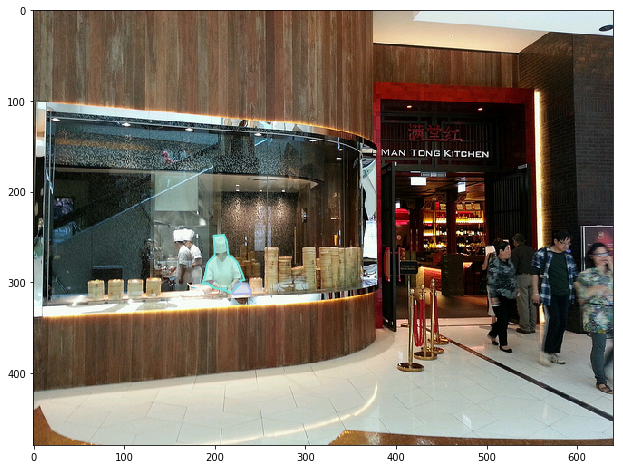

In [11]:
plt.figure(figsize=(12,8))
plt.imshow(I)
coco.showAnns([subject_anns,object_anns])